# **AUTHOR : SHREEYA PARAB**
# **OIASIS INFOBYTES :** DATA SCIENCE
# **TASK 3 : CAR PRICE PREDICTION**

# 1. Importing Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
sns.set(style='darkgrid')

# 2. Importing Data

In [7]:
data=pd.read_csv('car data.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# 3. Printing Unique values

In [8]:
print('Unique Values of Fuel Type',data['Fuel_Type'].unique())
print('Unique Values of Transmission',data['Transmission'].unique())
print('Unique Values of Selling Type',data['Selling_type'].unique())
print('Unique Values of Owner',data['Owner'].unique())
print('Unique Values of Year',data['Year'].unique())

Unique Values of Fuel Type ['Petrol' 'Diesel' 'CNG']
Unique Values of Transmission ['Manual' 'Automatic']
Unique Values of Selling Type ['Dealer' 'Individual']
Unique Values of Owner [0 1 3]
Unique Values of Year [2014 2013 2017 2011 2018 2015 2016 2009 2010 2012 2003 2008 2006 2005
 2004 2007]


# 4. Understanding the problem


*   Predicting the Selling Price of the Car
*   All 8 Features are Important
*   Going to use Random Forest Regressor to solve this problem






# 5. Exploratory Data Analysis

In [9]:
data.shape

(301, 9)

In [10]:
data.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [11]:
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [12]:
data.duplicated().sum()

2

In [10]:
#removing duplicate data
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


6. DATA VISUALIZATION

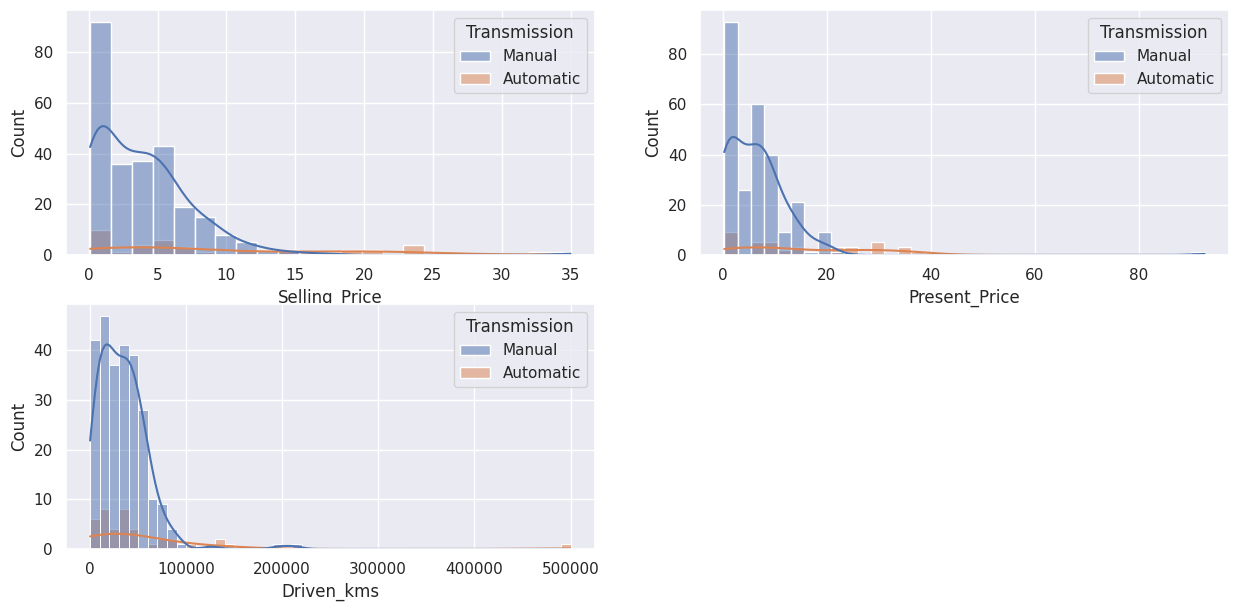

In [15]:
plt.figure(figsize=(15,7))
for i,col in enumerate(['Selling_Price','Present_Price','Driven_kms']):
  plt.subplot(2,2,i+1)
  sns.histplot(data=data, x=col, kde=True, hue='Transmission')

<Axes: xlabel='Driven_kms', ylabel='Count'>

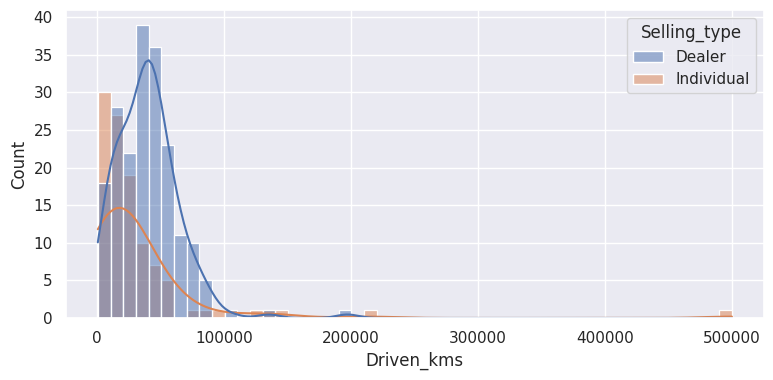

In [16]:
plt.figure(figsize=(9,4))
sns.histplot(data=data, x=col, kde=True, hue='Selling_type')

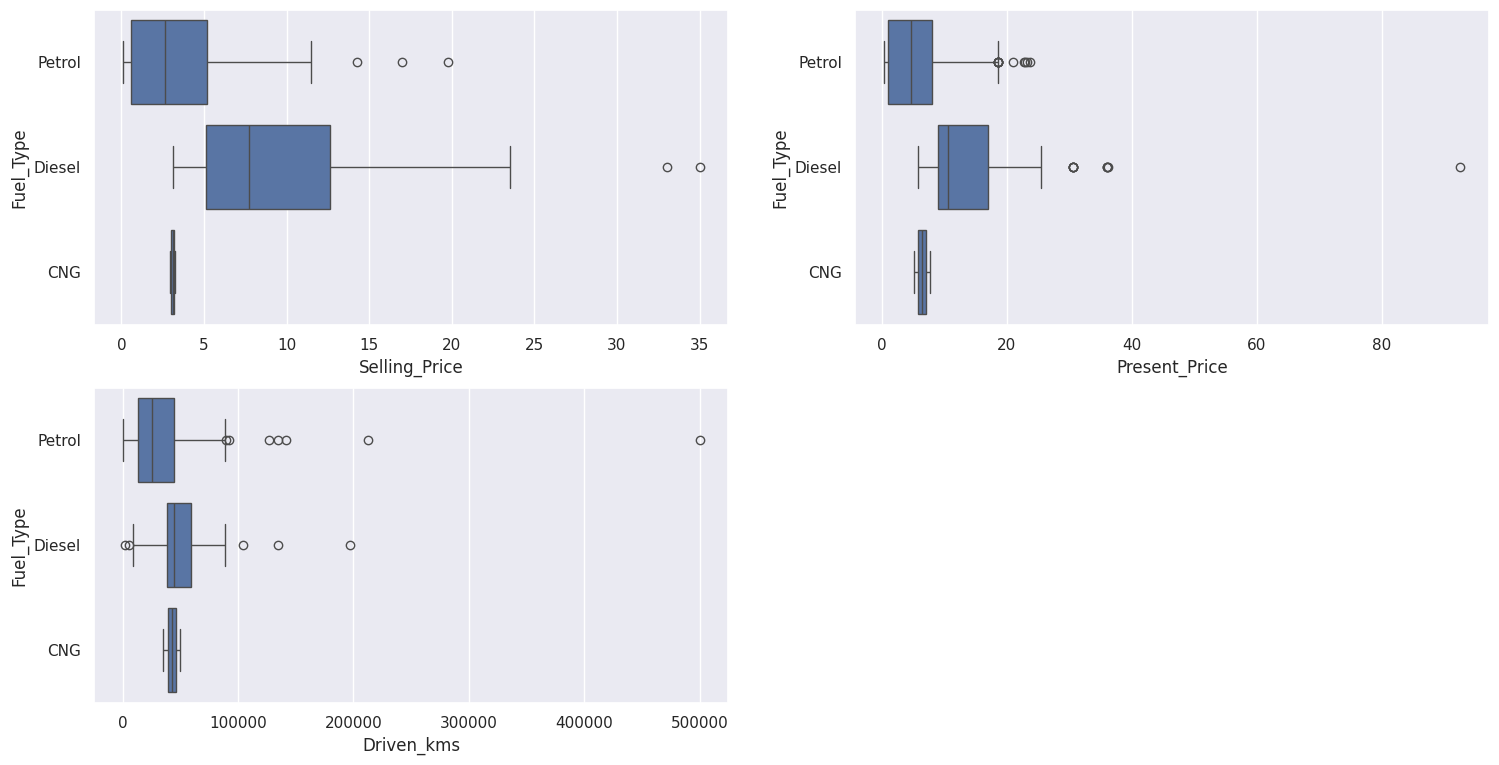

In [17]:
plt.figure(figsize=(18,9))
for i,col in enumerate(['Selling_Price','Present_Price','Driven_kms']):
  plt.subplot(2,2,i+1)
  sns.boxplot(data=data, y='Fuel_Type', x=col, orient='h')

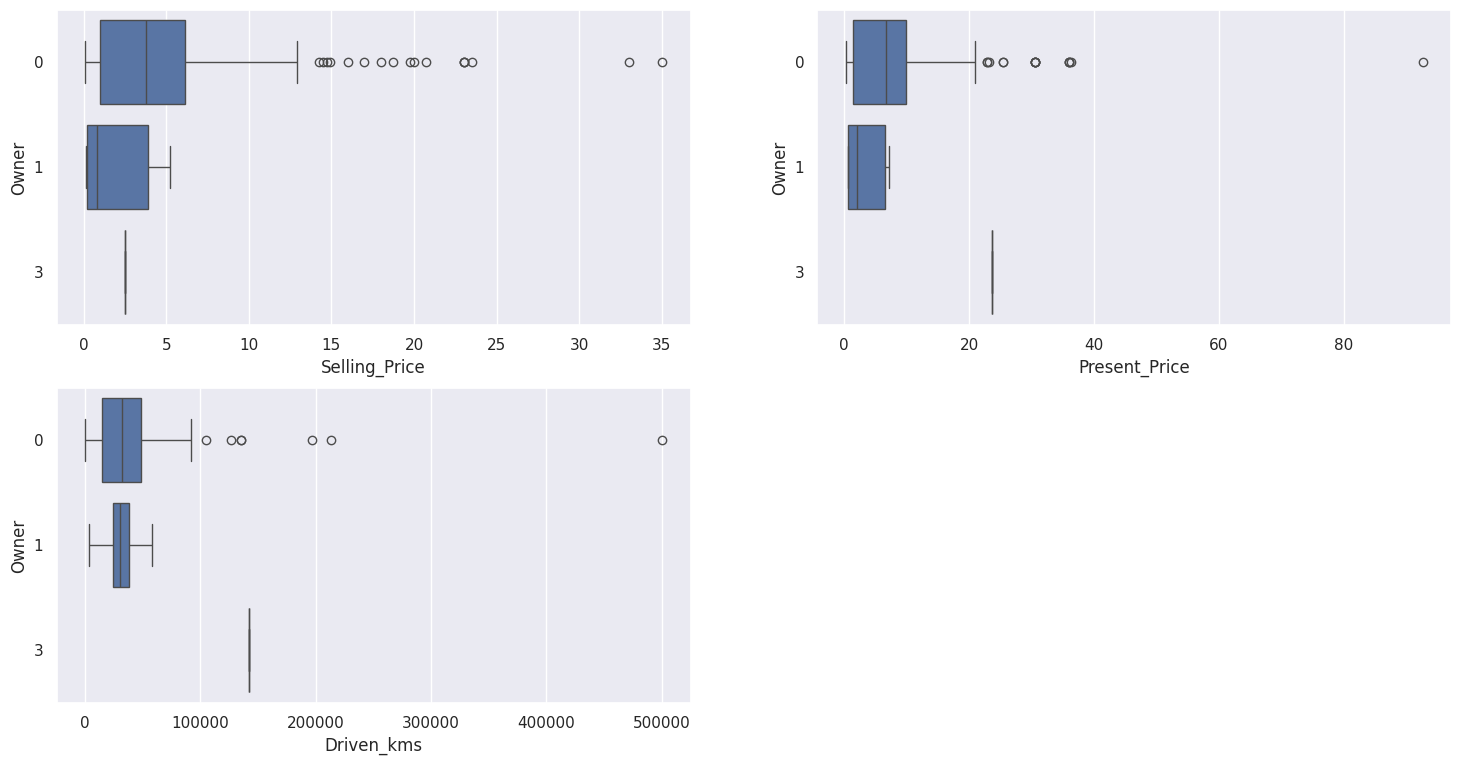

In [19]:
plt.figure(figsize=(18,9))
for i,col in enumerate(['Selling_Price','Present_Price','Driven_kms']):
  plt.subplot(2,2,i+1)
  sns.boxplot(data=data, y='Owner', x=col, orient='h')

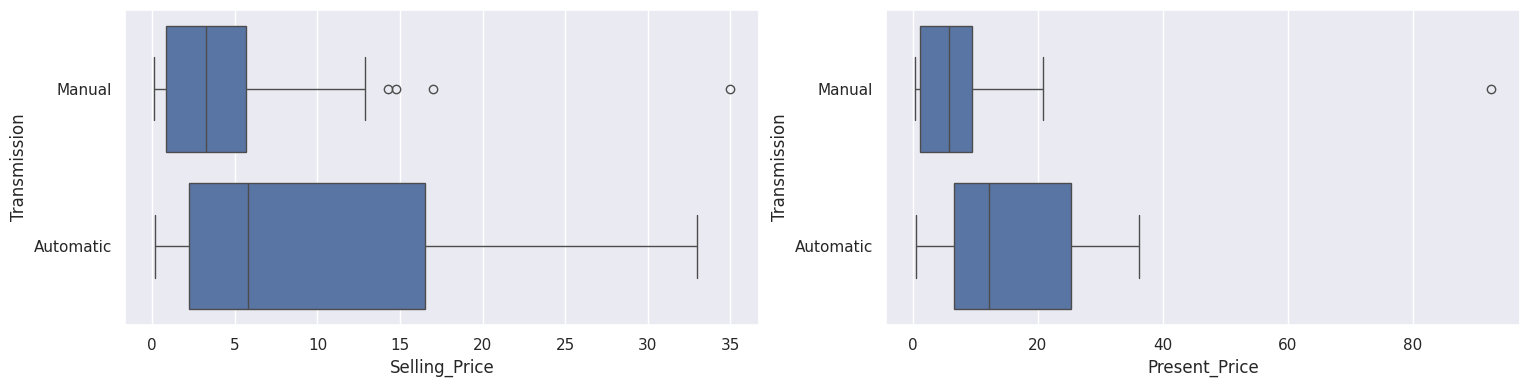

In [20]:
plt.figure(figsize=(18,9))
for i,col in enumerate(['Selling_Price','Present_Price']):
  plt.subplot(2,2,i+1)
  sns.boxplot(data=data, y='Transmission', x=col, orient='h')

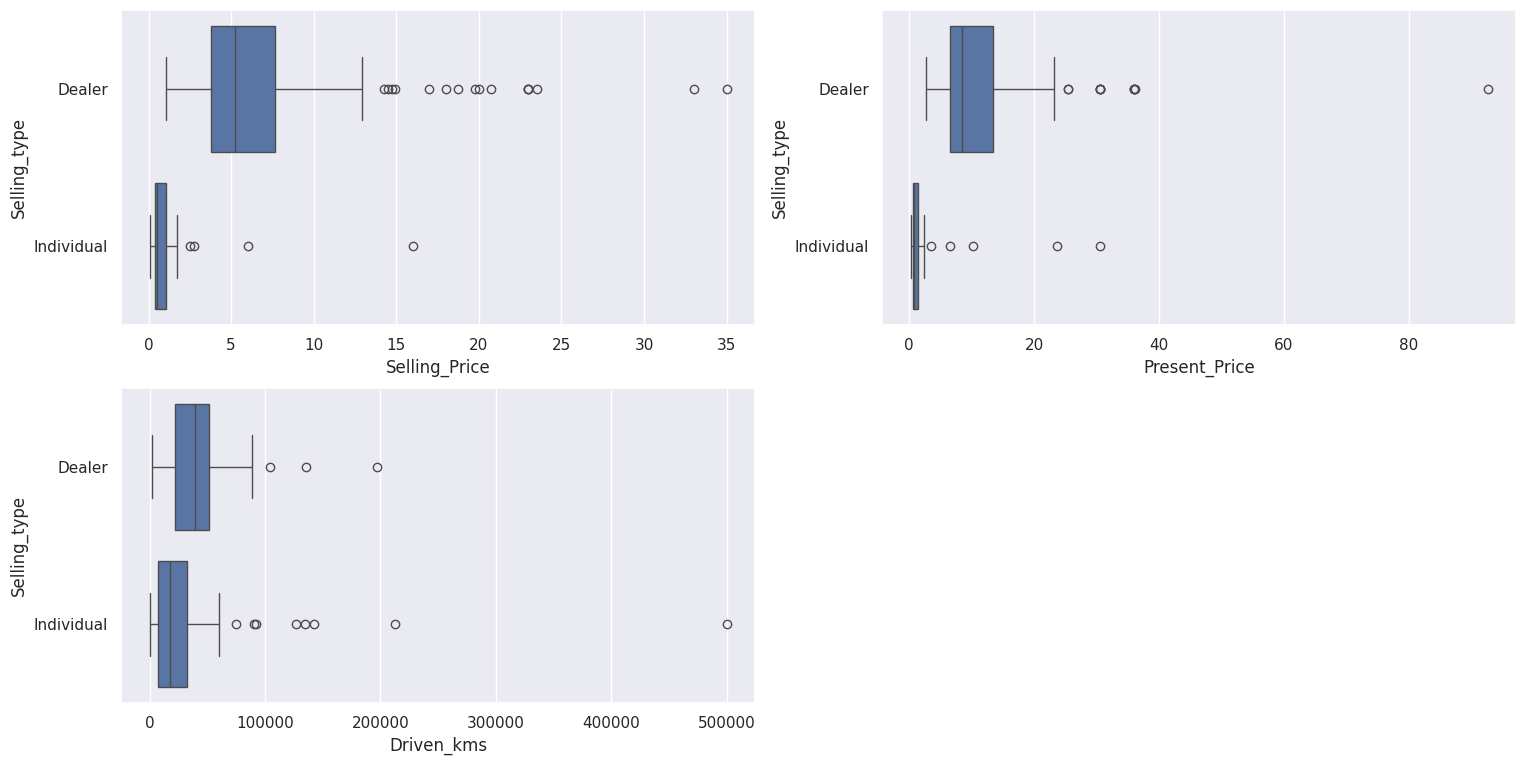

In [21]:
plt.figure(figsize=(18,9))
for i,col in enumerate(['Selling_Price','Present_Price','Driven_kms']):
  plt.subplot(2,2,i+1)
  sns.boxplot(data=data, y='Selling_type', x=col, orient='h')

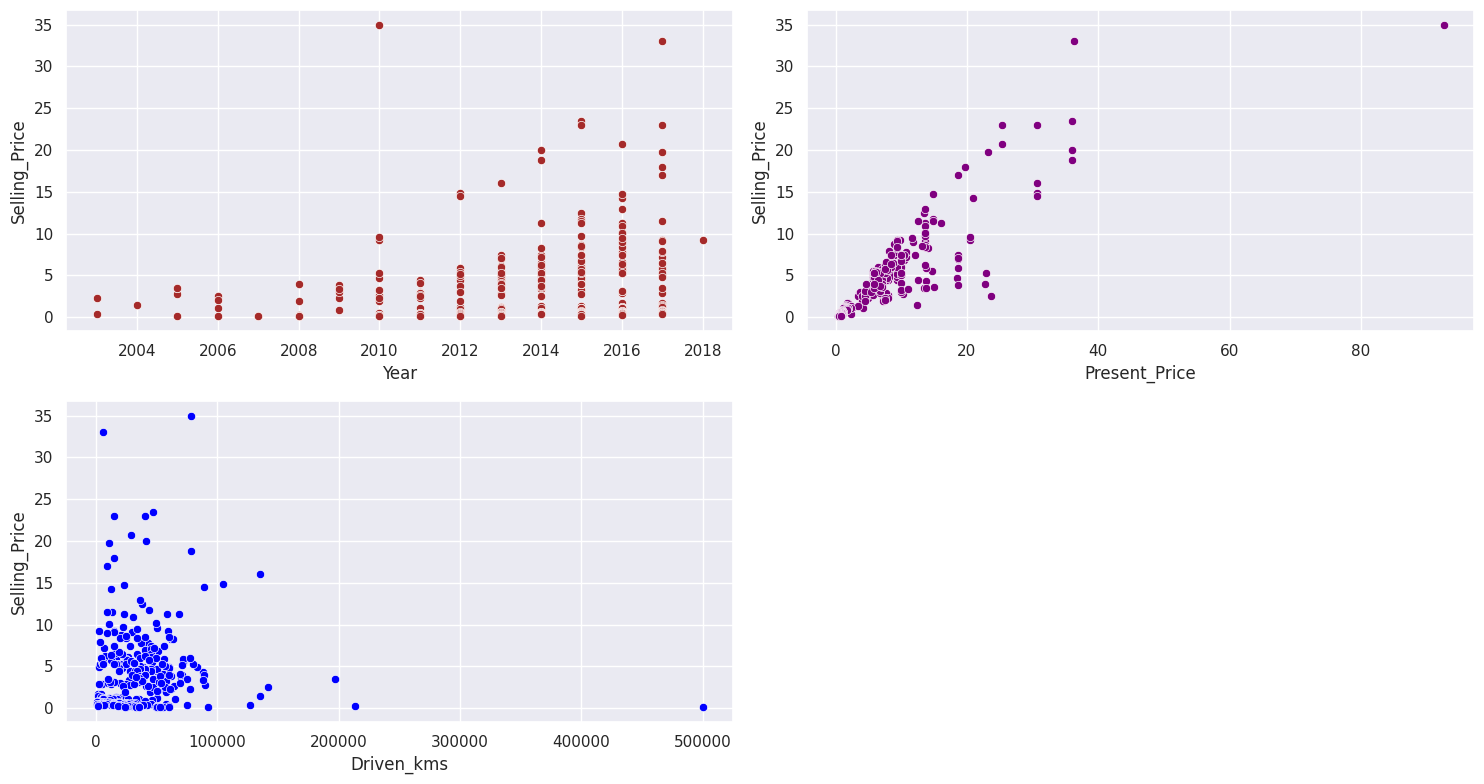

In [22]:
plt.figure(figsize=(15,8))
color=['brown','purple','blue']
for i,col in enumerate(['Year','Present_Price','Driven_kms']):
  plt.subplot(2,2,i+1)
  sns.scatterplot(data, x=col, y='Selling_Price', color=color[i])
plt.tight_layout()

# 7. Observation


1.   Present Price and Selling Price both are higher for Automatic Cars, and has higher Driven_kms than Manual Cars.
2.   Dealer has sold car at higher Selling Price than Individual.
3. Data contains a lot of outliers and need to be scaled as well.
4. Latest cars have higher Selling Price.
5. Selling Price is Greater than the Present Price.
6. Driven kms are lesser than Selling Price.
7. Diesel Cars have higher price than others, while Petrol Cars have higher price than CNG cars.



# 8. Pre-Processing of Data

In [23]:
#remove outliers of the data
def remove_outliers(col):
  data25=data[col].quantile(0.25)
  data75=data[col].quantile(0.75)
  diqr=data75-data25
  upper_lim=data75+1.5*diqr
  lower_lim=data25-1.5*diqr
  filter_data=data[(data[col]>=lower_lim) & (data[col] <= upper_lim)]
  return filter_data

data=remove_outliers('Selling_Price')
data=remove_outliers('Present_Price')
data=remove_outliers('Driven_kms')


In [24]:
#hot encoding
encoder=LabelEncoder()

encoder.fit(data['Fuel_Type'])
data['Fuel_Type']=encoder.fit_transform(data['Fuel_Type'])
dictft=dict(enumerate(encoder.classes_))
print(dictft)

encoder.fit(data['Selling_type'])
data['Selling_type']=encoder.fit_transform(data['Selling_type'])
dictst=dict(enumerate(encoder.classes_))
print(dictst)

encoder.fit(data['Transmission'])
data['Transmission']=encoder.fit_transform(data['Transmission'])
dicttr=dict(enumerate(encoder.classes_))
print(dicttr)

encoder.fit(data['Car_Name'])
data['Car_Name']=encoder.fit_transform(data['Car_Name'])
dictcn=dict(enumerate(encoder.classes_))
print(dictcn)

data.head()

{0: 'CNG', 1: 'Diesel', 2: 'Petrol'}
{0: 'Dealer', 1: 'Individual'}
{0: 'Automatic', 1: 'Manual'}
{0: 'Activa 3g', 1: 'Activa 4g', 2: 'Bajaj  ct 100', 3: 'Bajaj Avenger 150', 4: 'Bajaj Avenger 150 street', 5: 'Bajaj Avenger 220', 6: 'Bajaj Avenger 220 dtsi', 7: 'Bajaj Avenger Street 220', 8: 'Bajaj Discover 100', 9: 'Bajaj Discover 125', 10: 'Bajaj Dominar 400', 11: 'Bajaj Pulsar  NS 200', 12: 'Bajaj Pulsar 135 LS', 13: 'Bajaj Pulsar 150', 14: 'Bajaj Pulsar 220 F', 15: 'Bajaj Pulsar NS 200', 16: 'Bajaj Pulsar RS200', 17: 'Hero  CBZ Xtreme', 18: 'Hero  Ignitor Disc', 19: 'Hero Extreme', 20: 'Hero Glamour', 21: 'Hero Honda CBZ extreme', 22: 'Hero Honda Passion Pro', 23: 'Hero Hunk', 24: 'Hero Passion Pro', 25: 'Hero Passion X pro', 26: 'Hero Splender Plus', 27: 'Hero Splender iSmart', 28: 'Hero Super Splendor', 29: 'Honda Activa 125', 30: 'Honda Activa 4G', 31: 'Honda CB Hornet 160R', 32: 'Honda CB Shine', 33: 'Honda CB Trigger', 34: 'Honda CB Unicorn', 35: 'Honda CB twister', 36: 'Honda

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,86,2014,3.35,5.59,27000,2,0,1,0
1,89,2013,4.75,9.54,43000,1,0,1,0
2,66,2017,7.25,9.85,6900,2,0,1,0
3,92,2011,2.85,4.15,5200,2,0,1,0
4,88,2014,4.60,6.87,42450,1,0,1,0


# 9. Model Building

In [26]:
X=data.drop(columns=['Selling_Price'], axis=1)
X=X.values
Y=data[['Selling_Price']].values.flatten()

X[:5,], Y[:5]

(array([[8.600e+01, 2.014e+03, 5.590e+00, 2.700e+04, 2.000e+00, 0.000e+00,
         1.000e+00, 0.000e+00],
        [8.900e+01, 2.013e+03, 9.540e+00, 4.300e+04, 1.000e+00, 0.000e+00,
         1.000e+00, 0.000e+00],
        [6.600e+01, 2.017e+03, 9.850e+00, 6.900e+03, 2.000e+00, 0.000e+00,
         1.000e+00, 0.000e+00],
        [9.200e+01, 2.011e+03, 4.150e+00, 5.200e+03, 2.000e+00, 0.000e+00,
         1.000e+00, 0.000e+00],
        [8.800e+01, 2.014e+03, 6.870e+00, 4.245e+04, 1.000e+00, 0.000e+00,
         1.000e+00, 0.000e+00]]),
 array([3.35, 4.75, 7.25, 2.85, 4.6 ]))

# 10. Decision Trees to Find Model Best Fit to Data

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

In [28]:
mse_vals=[]
r2_vals=[]
min_mse=np.inf
max_r2=-np.inf
min_mse_n_est=None
max_r2_n_est=None

#from 1 decision tree to 100 decision trees
for i in range(1,101):
    rfr_model=RandomForestRegressor(n_estimators=i,random_state=42)
    rfr_model.fit(x_train, y_train)
    y_test_pred=rfr_model.predict(x_test)
    #MSE
    mse=mean_squared_error(y_test, y_test_pred)
    #R2 SCORE
    r2_sco=r2_score(y_test, y_test_pred)
    #append
    mse_vals.append(mse)
    r2_vals.append(r2_sco)
    #compare
    if mse<min_mse:
        min_mse=mse
        min_mse_n_est=i
    if r2_sco>max_r2:
        max_r2=r2_sco
        max_r2_n_est=i

print('Minimum MSE: {} with {}-estimators'.format(min_mse,min_mse_n_est))
print('Maximum R2 Score: {} with {}-estimators'.format(max_r2,max_r2_n_est))

Minimum MSE: 0.3717709242996666 with 79-estimators
Maximum R2 Score: 0.9634760476645946 with 79-estimators


# **Statement:**
As we saw above that n_estimator=33 gives us the best value so we can use this specific value to train our model; however, its just a small difference in R2 Score, but good of approximately 0.3 difference in MSE

# **ANALYSIS OF RESULTS**

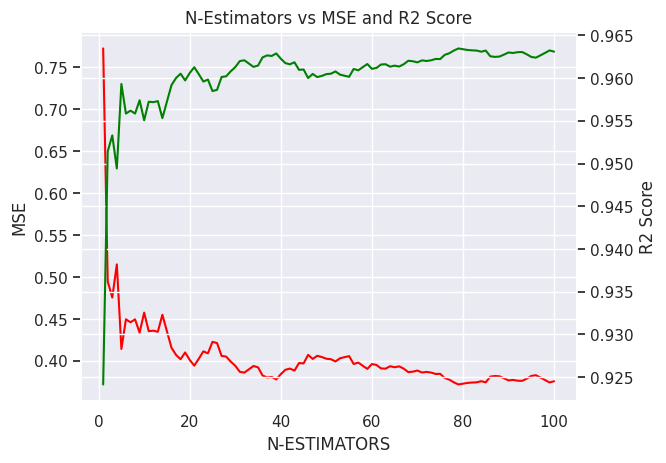

In [29]:
fig,ax=plt.subplots()
ax.plot(range(1,101),mse_vals,'red')
ax.set_xlabel('N-ESTIMATORS')
ax.set_ylabel('MSE')
ax2=ax.twinx()
ax2.plot(range(1,101),r2_vals,'green')
ax2.set_ylabel('R2 Score')
plt.title('N-Estimators vs MSE and R2 Score')
plt.show()

# **MODEL DEVELOPMENT**

In [30]:
#model development
rfr_model=RandomForestRegressor(n_estimators=33,random_state=42)
rfr_model.fit(x_train,y_train)
y_test_pred=rfr_model.predict(x_test)

#MSE
mse=mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error: ",mse)

#R2 SCORE
r2_sco=r2_score(y_test, y_test_pred)
print("R2 Score: ",r2_sco)

Mean Squared Error:  0.3898010311217319
R2 Score:  0.9617047129013613


# **OUTPUT vs PREDICTED**

Text(0, 0.5, 'Predicted Test Values')

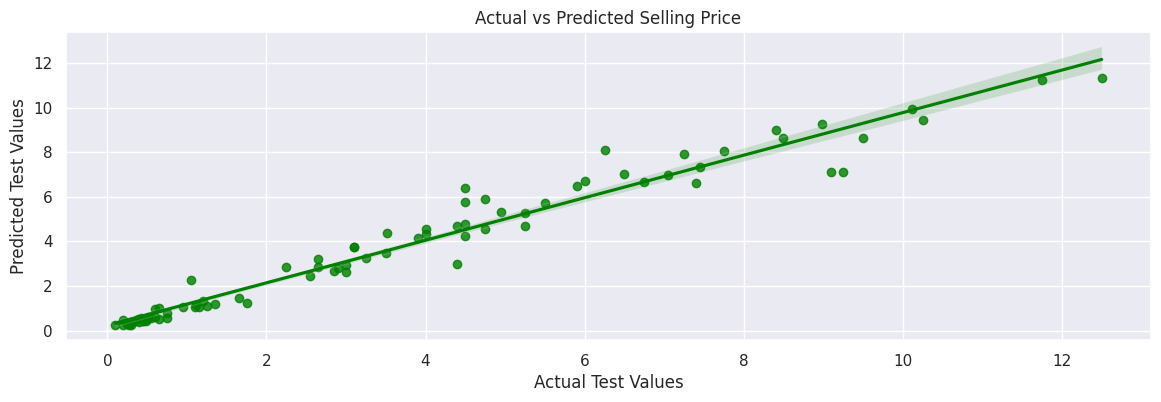

In [32]:
fig=plt.figure(figsize=(14,4))
sns.regplot(x=y_test,y=y_test_pred,color='green')
plt.title('Actual vs Predicted Selling Price')
plt.xlabel('Actual Test Values')
plt.ylabel('Predicted Test Values')

As per plot above, The Model results seems Satisfactory

# **Importance of Features**

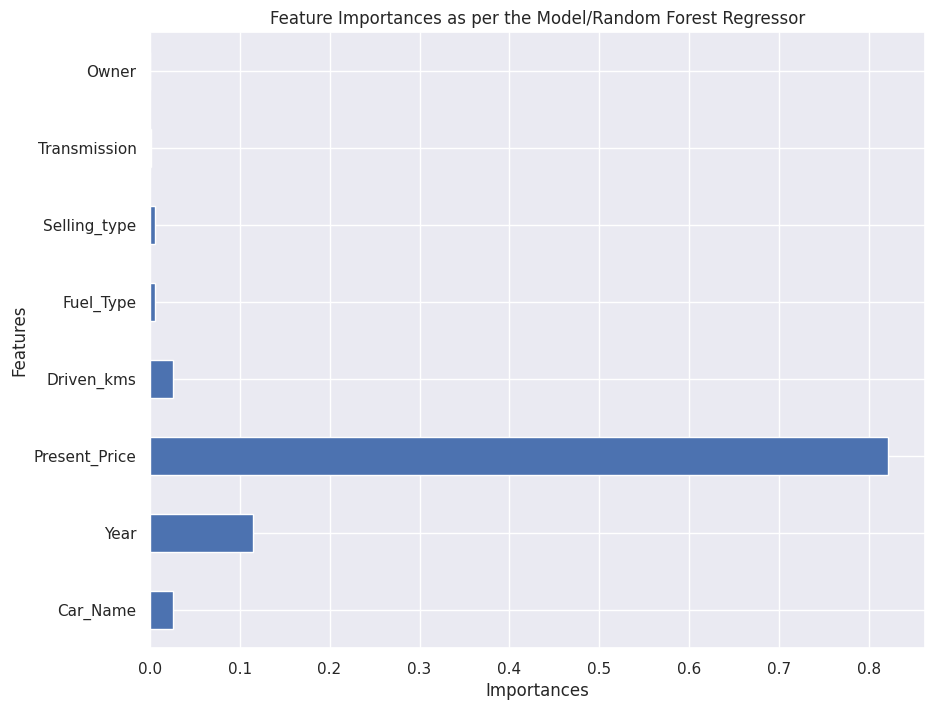

In [33]:
feature_imps=pd.Series(rfr_model.feature_importances_,index=['Car_Name','Year','Present_Price','Driven_kms','Fuel_Type','Selling_type','Transmission','Owner'])
plt.figure(figsize=(10,8))
feature_imps.plot(kind='barh')
plt.ylabel('Features')
plt.xlabel('Importances')
plt.title('Feature Importances as per the Model/Random Forest Regressor')
plt.show()